1. Загрузите файл HR.csv в pandas dataframe

In [2]:
import pandas as pd

hr_df = pd.read_csv('https://drive.google.com/uc?id=1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1')

2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).

In [65]:
stats = hr_df.describe()

mode = hr_df.mode()

stats.loc['mode'] = mode.iloc[0]

print(stats)

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   
mode             0.100000         0.550000        4.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000

3. Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.

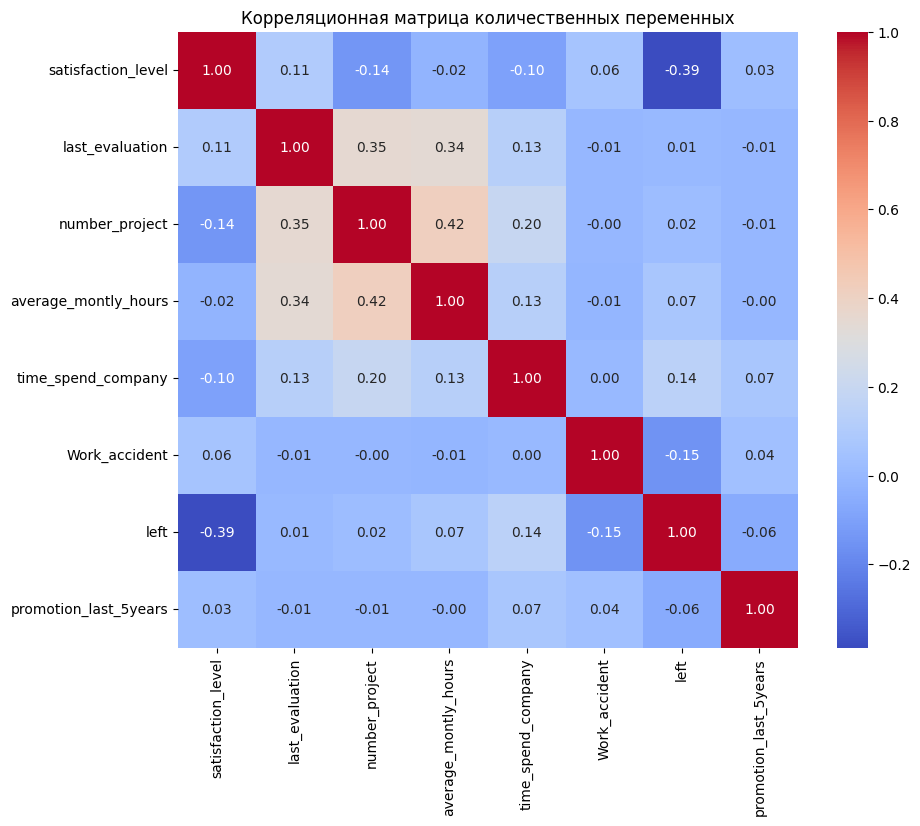

Две самые скоррелированные переменные:
number_project        average_montly_hours    0.417211
average_montly_hours  number_project          0.417211
dtype: float64

Две наименее скоррелированные переменные:
time_spend_company  Work_accident         0.00212
Work_accident       time_spend_company    0.00212
dtype: float64


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = hr_df.select_dtypes(include=['int64', 'float64']) # Оставляем количественные переменные

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица количественных переменных')
plt.show()

# Смотрим коррелированные столбцы
correlation_stack = correlation_matrix.abs().unstack()
sorted_correlation = correlation_stack.sort_values(kind="quicksort", ascending=False)
corr_columns = sorted_correlation[sorted_correlation < 1].head(2)
print("Две самые скоррелированные переменные:")
print(corr_columns)

# Смотрим наименее скоррелированные
not_corr_columns = sorted_correlation[sorted_correlation < 1].tail(2)
print("\nДве наименее скоррелированные переменные:")
print(not_corr_columns)


Показать распределение сотрудников по зарплатам.

<Axes: ylabel='salary'>

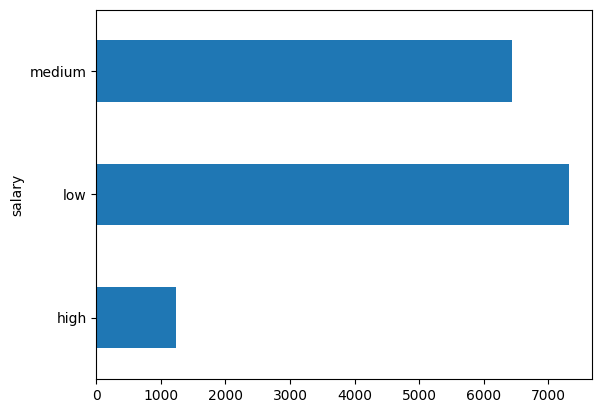

In [6]:
hr_df.groupby('salary')['salary'].count().plot(kind="barh")

Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

Распределение сотрудников по зарплатам в каждом департаменте

salary       high   low  medium
department                     
IT             83   609     535
RandD          51   364     372
accounting     74   358     335
hr             45   335     359
management    225   180     225
marketing      80   402     376
product_mng    68   451     383
sales         269  2099    1772
support       141  1146     942
technical     201  1372    1147


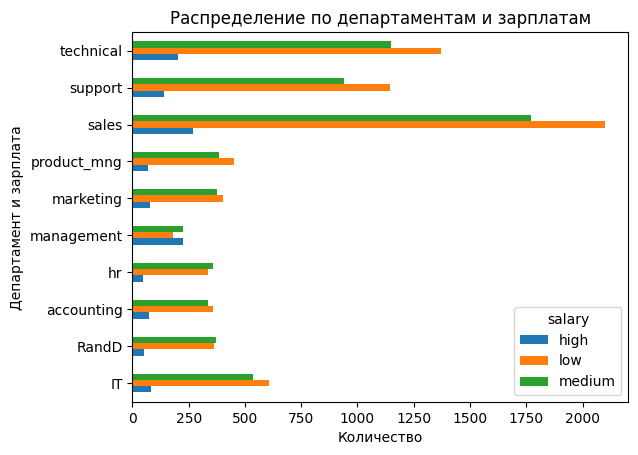

In [28]:
print('Распределение сотрудников по зарплатам в каждом департаменте\n')
print(hr_df.groupby(['department', 'salary']).size().unstack())

# Строим виз
hr_df.groupby(['department', 'salary']).size().unstack().plot(kind='barh')
plt.xlabel('Количество')
plt.ylabel('Департамент и зарплата')
plt.title('Распределение по департаментам и зарплатам')
plt.show()

Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

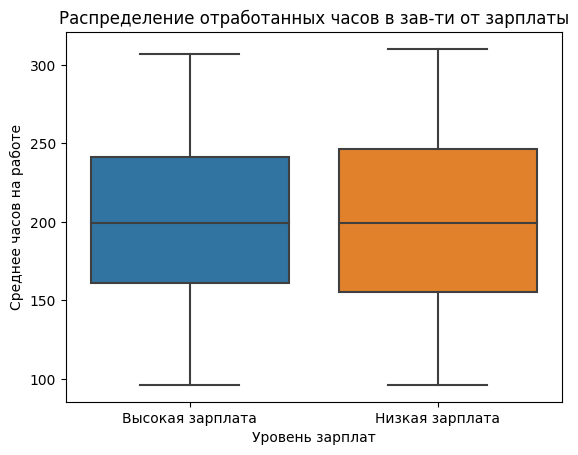

-0.7288680398062308 0.4661023478267259


In [37]:
high_salary_df = hr_df[hr_df['salary'] == 'high']['average_montly_hours']
low_salary_df = hr_df[hr_df['salary'] == 'low']['average_montly_hours']
salary_df = pd.DataFrame({'Высокая зарплата': high_salary_df, 'Низкая зарплата': low_salary_df})

# Строим виз
sns.boxplot(data=salary_df)
plt.xlabel('Уровень зарплат')
plt.ylabel('Среднее часов на работе')
plt.title('Распределение отработанных часов в зав-ти от зарплаты')
plt.show()

# видно, что не влияет, но посчитаем еще
import scipy.stats as stats
t, p = stats.ttest_ind(high_salary_df, low_salary_df)
print(t, p)
# гипотезу отвергаем

Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

Доля сотрудников с повышением за последние 5 лет

Средняя степень удовлетворенности

Среднее количество проектов

In [61]:
df_left_job = hr_df[hr_df['left'] == 1]
df_job = hr_df[hr_df['left'] != 1]

print('Доля с повышением среди уволившихся:')
print(f"{df_left_job['promotion_last_5years'].mean():.2%}")

print('\nДоля с повышением среди работающих:')
print(f"{df_job['promotion_last_5years'].mean():.2%}")

print('\nСредняя степень удовлетворенности среди уволившихся')
print(f"{df_left_job['satisfaction_level'].mean():.2%}")

print('\nСредняя степень удовлетворенности среди работающих')
print(f"{df_job['satisfaction_level'].mean():.2%}")

print('\nСреднее кол-во проектов среди уволившихся')
print(df_left_job['number_project'].mean())

print('\nСреднее кол-во проектов среди работающих')
print(df_job['number_project'].mean())

Доля с повышением среди уволившихся:
0.53%

Доля с повышением среди работающих:
2.63%

Средняя степень удовлетворенности среди уволившихся
44.01%

Средняя степень удовлетворенности среди работающих
66.68%

Среднее кол-во проектов среди уволившихся
3.8555026603192384

Среднее кол-во проектов среди работающих
3.786664333216661


Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

X = hr_df.drop(['left', 'department', 'salary'], axis=1)
y = hr_df['left'] #целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
predictions = lda.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Точность модели на тестовой выборке: {accuracy:.2f}")

# так себе модель, похоже на то, что фильтрованные факторы не влияют


Точность модели на тестовой выборке: 0.76


Последний пункт link :